/var/folders/t9/jbtljv2j2rj45c_89djsvtt40000gn/T/ipykernel_31968/2529823295.py:40: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  self.traffic_data.groupby(self.traffic_data.index.hour).mean().plot(kind='line', rot=0, ax=axs)


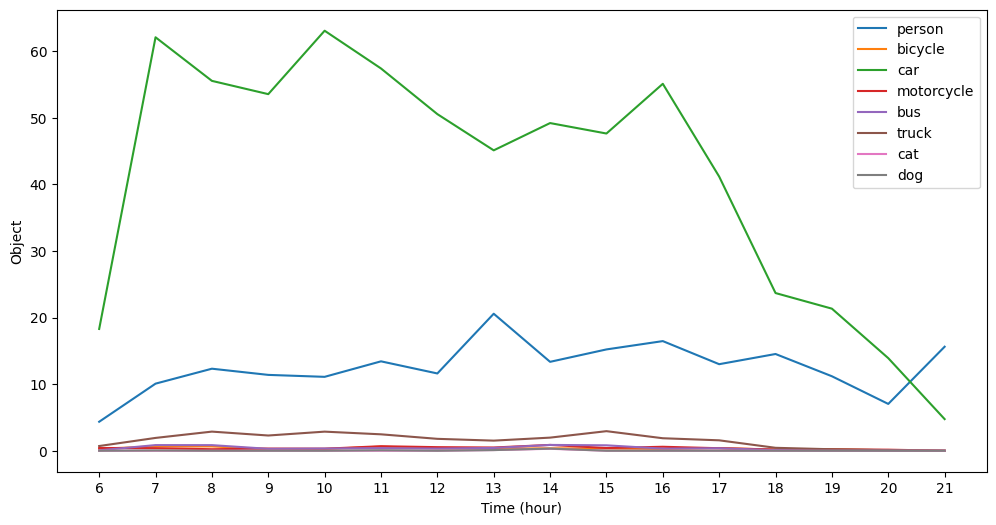

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

class TrafficCounterAnalysis():

    def import_data(self):
        self.traffic_data = pd.read_csv('data/traffic_counter_data.csv', delimiter=';')


    def clean_data(self):
        # convert to datetime
        # self.traffic_data["time_stamp"] = pd.to_datetime(self.traffic_data["time_stamp"])

        # extract date and time
        self.traffic_data["dt"] = pd.to_datetime(self.traffic_data["time_stamp"])

        # round 15 mins
        self.traffic_data["dt"] = self.traffic_data["dt"].dt.round('15min')

        self.traffic_data["time"] = self.traffic_data["dt"].dt.time

        # drop unneeded columns
        self.traffic_data = self.traffic_data.drop(columns=['id','time_stamp'])

        # make date index
        self.traffic_data = self.traffic_data.set_index('dt')

        # rearrange cols
        cols = self.traffic_data.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        self.traffic_data = self.traffic_data[cols]

        self.traffic_data = self.traffic_data.sort_index(ascending=True)


    def plot_data(self):
        fig, axs = plt.subplots(figsize=(12, 6))
        self.traffic_data = self.traffic_data.between_time('6:00','21:00')
        self.traffic_data.groupby(self.traffic_data.index.hour).mean().plot(kind='line', rot=0, ax=axs)
        plt.xticks(np.arange(6, 22, 1))
        plt.xlabel("Time (hour)");
        plt.ylabel("Object");
        fig.savefig('traffic_data_plot.png')



tca = TrafficCounterAnalysis()
tca.import_data()
tca.clean_data()
tca.plot_data()